# Método da secante
***

O método da secante utiliza uma filosofia um pouco diferente dos métodos anteriores. Ao invés de analisar a convergência de um intervalo que contêm a raiz, o método da secante monitora um único ponto que (sob condições favoráveis) deve convergir para a raiz.

Assim como os métodos anteriores, começamos com dois pontos que definem um intervalo (mas estes não precisam conter a raiz). A regra de iteração é a mesma do método do ponto falso, mas ao invés de escolher qual dos dois valore $x_a$ e $x_b$ iremos escolher, fazemos sempre a substituição:

$$ x_b' = \frac{x_a.g_b-x_b.g_a}{g_b-g_a}$$

$$ x_a' = x_b$$

O método da secante é bem mais rápido que o da bisseção e da posição falsa

***
### Exemplos
***

Importa as bibliotecas

In [1]:
import numpy
import matplotlib.pyplot as matplot
%matplotlib inline

***

Definimos a nossa função $f(x) = x^2 + 2x + 1$ e o valor de $y_0$

Queremos encontrar o valor de $x$ para o qual $f(x) = y_0$

In [2]:
def f(x):
    return x*x + 2*x + 1

y0 = 42

***

Definimos $g(x)$, a função que queremos encontrar os zeros

In [3]:
def g(x):
    return f(x) - y0

***

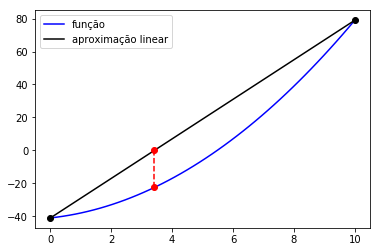

0) g(x): 79.0000000


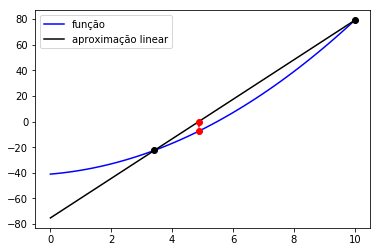

1) g(x): -22.4930556


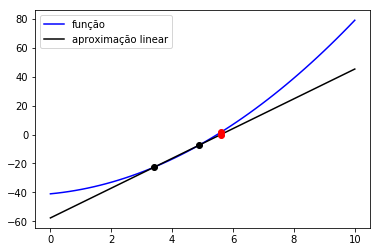

2) g(x): -7.4764354


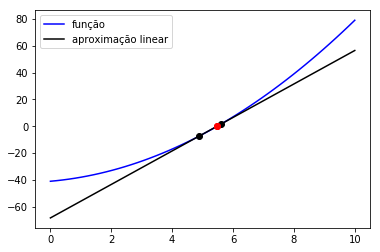

3) g(x): 1.5875031


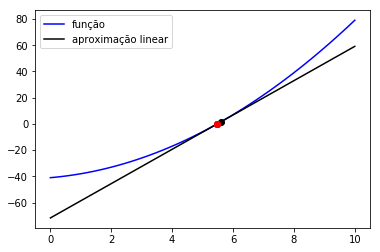

4) g(x): -0.0762318


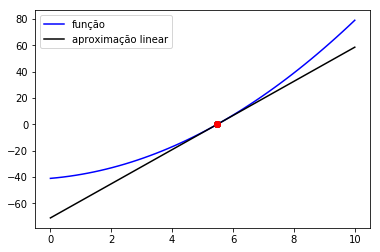

5) g(x): -0.0007077


In [4]:
x = numpy.linspace(0, 10)
y = g(x)
xa, xb = 0, 10
ya, yb = g(xa), g(xb)

for i in range(6):
    # Propriedades da reta aproximadora para desenhar no gráfico
    m = (yb - ya) / (xb - xa)
    y_line = ya + m * (x - xa)
    x_false = xa - ya / m
    
    matplot.plot(x, y, 'b-', label='função')
    matplot.plot(x, y_line, 'k-', label='aproximação linear')
    matplot.plot([xa, xb], [ya, yb], 'ko')
    matplot.plot([x_false, x_false], [0, g(x_false)], 'ro--')
    matplot.legend(loc='best')
    matplot.show()
    print('%s) g(x): %.7f' % (i, yb))
    
    # Regra de atualização
    xa, xb = xb, (xa * yb - xb * ya) / (yb - ya)
    ya, yb = yb, g(xb)

***
### Criando a função
***

In [5]:
def secant(g, x0, x1, x_tolerance=1e-6, y_tolerance=1e-6):
    """
    Calcula o zero de g(x) dentro do intervalo (x0, x1) utilizando o método da 
    secante. O método não exige que a raiz de g(x) esteja neste intervalo e
    nem garante que o resultado estará entre x0 e x1.
    
    Argumentos:
    
        g: uma função de uma única variável
        x0, x1: intervalo inicial para a busca do zero de g(x)
        x_tolerance: tolerância em x (retorna quando intervalo for menor que x_tolerance)
        y_tolerance: tolerância em y (retorna quando |g(x)| < y_tolerance)
    
    Retornos:
    
        Retorna um zero de g(x) (valor de x em que g(x) = 0).
    """
    
    xa, xb = x0, x1
    ya, yb = g(x0), g(x1)
    
    while True:
        xa, xb = xb, (xa * yb - xb * ya) / (yb - ya)
        ya, yb = yb, g(xb)
        if abs(xb - xa) < x_tolerance or abs(yb) < y_tolerance:
            break
    return xb

***

Funciona como as outras funções

In [6]:
x = secant(g, 0, 10)
print("x = %.7f, y = %.7f" % (x, g(x)))

x = 5.4807407, y = 0.0000003


***

In [7]:
x = secant(numpy.cos, 0, 4)
print("x = %.7f, y = %.7f" % (x, numpy.cos(x)))

x = 42.4115008, y = 0.0000000
